#***Proyecto Módulo 2: Clasificación de proyectos financiados a través de crowdfunding***

**<h3>Integrantes:</h3>**



*   Edwar Fabián Panqueba Moreno
*   Santiago Ruiz Rozo





# **0. Cargue de las librerias que se usarán en el proyecto**


In [ ]:
# Importación de librerias
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
import gdown

# Omitir advertencias
import warnings
warnings.simplefilter(action = 'ignore')

# Visualizar correctamente las gráficas en el notebook
%matplotlib inline

# Importación de la librería para el trabajo con machine learning
import sklearn

# **1. Descripción de los datos**
---

El crowdfunding, o micromecenazgo, es una estrategia que consiste en obtener fondos en línea para financiar un proyecto a través de la aportación de un elevado número de inversores. La ventaja de este método, en comparación con otros mecanismos de financiamiento, es que permite reunir muchos recursos sin poner en riesgo una suma importante de dinero por inversor. Muchas personas en el mundo con ideas innovadoras y creativas de negocio, pero que no cuentan con los recursos económicos para iniciarlos, recurren cada vez más a este tipo de estrategias. ***Kickstarter*** es una popular plataforma de financiación a través del crowdfunding que ha ayudado a miles de emprendedores y creadores a dar vida a sus ideas innovadoras. Sin embargo, no todos los proyectos de *Kickstarter* tienen éxito, y comprender los factores que contribuyen al éxito o al fracaso puede ser valioso tanto para los creadores como para los inversores. El dataset con el que se trabajará en este proyecto, contiene información de 374853 proyectos que han sido promovidos a través de la plataforma Kickstarter, y el propósito será estudiar las características contenidas en las columnas que componen el dataset, con el apoyo de algún método de apredizaje de máquina, de tal manera que sea posible clasificar correctamente un nuevo proyecto como exito o fracaso.

El dataset contiene 7 columnas con variables categóricas, incluyendo la variable objetivo, y 4 variables numéricas, incluyendo la variable del ID, las cuales se describen a continuación.


| Variable | Definición	| 
| --- | --- |
| ID | Identificador único para cada proyecto |
| Name | Nombre del proyecto |
| Category | Categoría principal del proyecto (ej. tecnología, arte, música, etc.) |
| Subcategory | Subcategoría del proyecto (ej. apps móviles, pintura, música rock, etc.) |
| Country | País donde se origina el proyecto |
| Launched | Fecha de lanzamiento del proyecto |
| Deadline | Fecha límite para el crowdfunding |
| Goal | Cantidad de dinero que el creador necesita para iniciar su proyecto (en USD) |
| Pledged | Cantidad de dinero prometida por los inversionista en la plataforma |
| Backers | Número de patrocinadores del proyecto |
| State | Estado actual del proyecto | 




# **2. Carga de datos**
---

In [ ]:
# Identificación del archivo CSV en Drive para su descarga
!gdown --id 1-iBRQO1FifJAY4G9WrSHK1SVL0oP4Ork

# Asignación a un objeto tipo dataframe del archivo CSV
project_df = pd.read_csv('kickstarter_projects.csv')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-iBRQO1FifJAY4G9WrSHK1SVL0oP4Ork
To: /content/kickstarter_projects.csv
100% 49.2M/49.2M [00:00<00:00, 135MB/s]


## **2.1 Limpieza de los datos**

Una vez cargado el dataset en su correspondiente dataframe, la opción **`.info`** de Pandas para conocer la cantidad y el tipo de datos contenidos en cada una de las respectivas columnas.

In [ ]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


En este proyecto, la columna State corresponde a la variable de clasificación, y el problema a estudiar, inicialmente, se considera como un problema de clasificación binaria debido a que a partir de los datos correspondientes a cada una de las características del negocio, se desea clasificar como un proyecto exitoso o fracasado. Por lo tanto, es necesario comprobar que la columna correspondiente a la variable de clasificación contenga solo dos posibles etiquetas. 

In [ ]:
project_df['State'].unique()

array(['Failed', 'Successful', 'Canceled', 'Suspended', 'Live'],
      dtype=object)

Las etiquetas ***Failed*** y ***Successful*** son las que se emplearán para clasificar los proyectos de la plataforma Kickstarter, con los diferentes métodos de aprendizaje máquina que se pretenden aplicar. Las etiquetas ***Canceled*** y ***Suspended*** son asignadas a proyectos que se propusieron pero lograron ser ejecutados, y aquellos que iniciaron, pero por alguna razón tuvieron que ser suspendidos y no lograron ser finalizados. La etiqueta ***Live***, corresponde a proyectos que fueron exitosos y aún se mantienen vigentes, luego podrían ser clasificados como ***Successful***, y las filas que se correspondan con etiquetas ***Canceled*** y ***Suspended*** serán eliminadas, que no aportan información útil para el entrenamiento y prueba del modelo.

In [ ]:
# Se eliminan las filas que correspondan a etiquetas Canceled y Suspended
project_df.drop(project_df[(project_df['State'] == 'Canceled') | (project_df['State'] == 'Suspended')].index, inplace=True)

# Las filas en cuya columna State se encuentre la etiqueta Live, es cambiada por la etiqueta Successful
project_df['State'] = project_df['State'].apply(lambda x: 'Successful' if x == 'Live' else x)

Ahora, las columnas ID, Name, Lauched y Deadline serán eliminadas, ya que no aportan información relevante que sea requerida para la tarea de clasificación que deben realizar los métodos de aprendizaje de máquina que se emplearán en este proyecto.

In [ ]:
# Se emplea el método drop para la eliminación de las columnas
project_df.drop(['ID','Name', 'Launched', 'Deadline'], axis = 1, inplace = True)

Posteriormente, se deben determinar la cantidad de datos diferentes contenidos en las columnas Country, Category y Subcategory, dado que al ser variables categóricas, se requerirá emplear algún método de preprocesarmiento para que el método de aprendizaje pueda trabajar con ellas, sin embargo, esto podría hacer que la dimensión del conjunto de datos aumentara considerablemente, lo que podría representar un problema para la tarea de clasificación. Se dejarán dentro del dataframe aquellas columnas que no posean muchos datos diferentes y se puedan considerar que podrían aportar información importante para la clasificación de los diferentes ejemplos.

In [ ]:
numb_country = project_df['Country'].nunique()
numb_category = project_df['Category'].nunique()
numb_subcategory = project_df['Subcategory'].nunique()
print(f'Cantidad de datos distintos en la variable Country: {numb_country}')
print(f'Cantidad de datos distintos en la variable Category: {numb_category}')
print(f'Cantidad de datos distintos en la variable Country: {numb_subcategory}')

Cantidad de datos distintos en la variable Country: 22
Cantidad de datos distintos en la variable Category: 15
Cantidad de datos distintos en la variable Country: 159


La variable Subcategory cotiene 159 datos diferentes como se puede apreciar, y considerarla dentro del conjunto de datos a estudiar haría que su dimensión aumentara mucho al momento de hacer el preprocesamiento de esta variable, además, la variable Category contiene información semejante que podría resumir la variable Subcategory, considerando que son más pocos datos distintos los que contiene. Por lo tanto, se opta por mantener las variables Country y Category al poseer un menor número de datos distintos, y se elimina la variable Subcategory.

In [ ]:
project_df.drop(['Subcategory'], axis = 1, inplace = True)

Finalmente, se comprueba si hay presencia de datos nulos que puedan afectar el rendimiento de los métodos de aprendizaje, ya que sería necesario completarlos de alguna forma, o eliminar las respectivas filas.

In [ ]:
# Se comprueba la existencia de datos nulos por cada columna del dataframe
project_df.isnull().sum()

Category    0
Country     0
Goal        0
Pledged     0
Backers     0
State       0
dtype: int64

Como se puede apreciar, no hay presencia de datos nulos en el dataframe luego de la eliminación de las columnas previamente mencionadas. Por lo tanto, se trabajará con el dataframe que ha resultado posterior a la limpieza de las columnas innecesarias y cambio de etiquetas de la variable objetivo hecho anteriormente.

## **2.2 Preguntas a responde a partir de los datos**



*   ¿El conjunto de datos está balanceado con respecto a las dos etiquetas de clase, y en caso de no estarlo, el desbalanceo no es lo suficientemente significativo para impedir que el dataset pueda ser usado para la aplicación de la tarea de clasificación?

*   ¿Cuál es la categoría con mayor número de proyectos exitosos y cuál la de mayor número de proyectos fracasados?

*   ¿Qué tan importante resulta ser el preprocesamiento de las variables numéricas, antes de realizar las tareas de entrenamiento y predicción sobre los modelos de aprendizaje máquina considerados en el presente estudio?



## **2.3 Objetivos**

**Objetivo General**. \\
Clasificar correctamente en exitos o fracasos los proyectos expuestos en la plataforma *Kickstarter*, de tal manera que posibilite la toma de decisiones a creadores e inversores. \\

**Objetivos Específicos**:


1.   Seleccionar métodos de aprendizaje supervisado y no supervisado que posibiliten la clasificación de los proyectos publicados en la plataforma, teniendo en cuenta la naturaleza de los datos y el problema definido.

2.   Evaluar a partir de las métricas apropidas el rendimiento de los diferentes modelos empleados en el problema de clasificación.

3.   Definir el modelo de mayor precisión para la correcta agrupación de futuros datos, para así poder tomar decisiones de inversión basados en los resultados del modelo de aprendizaje automatico seleccionado




## **2.4 Hipótesis**

* Se espera que los métodos de aprendizaje supervisado sean más precisos que los de aprendizaje no supevisado, pues estos tienen en cuenta los resultados de las etiquetas para el entrenamiento del modelo

* Se espera un alto costo computacional debido a la cantidad de datos y la cantidad de dimensiones que pueden tener las variables de entrenamiento

* Es probable que se pueda economizar en costo computacional mediante una reducción de dimensionalidad, por lo que se puede utilizar como estrategía en caso de que los modelos tarden un tiempo considerable

* Se espera que algunas de las categorias como son tecnología, juegos diseño y arte sean aquellas con mayor tendencia a resultar en proyectos exitosos. De igual forma, se espera que de los paises más desarrollados se encuentren la mayor cantidad de proyectos exitosos pues pueden dar mayor confiabilidad a los patrocinadores e inversionistas.

# **3. Algunas visualizaciones del conjunto de datos**
---

Para determinar si el conjunto de datos se encuentra balanceado con respecto a la variable objetivo, se graficarán los datos empleando la librería Seaborn y algunos comandos que facilita el trabajo con Pandas.

Text(0.5, 1.0, 'Cantidad de proyectos por cada clase')

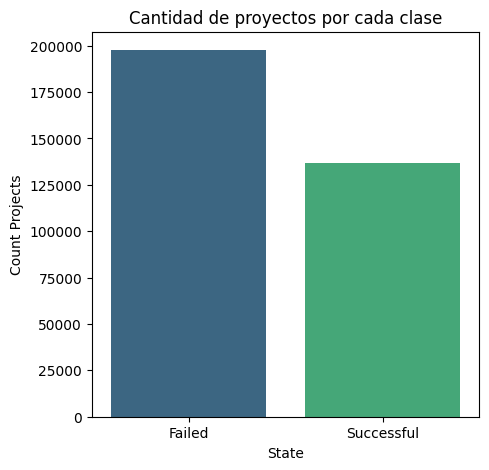

In [ ]:
# Construcción de un diagrama de frecuencia para los datos de cada una de las clases.
plt.figure(figsize=(5,5))
sns.countplot(project_df, x='State', palette = 'viridis').set(xlabel = 'State', ylabel = 'Count Projects');
plt.title('Cantidad de proyectos por cada clase')

Del gráfico anterior se puede apreciar que el conjunto de datos está desbalanceado, es decir, existen más datos correspondientes a la etiqueta Failed con respecto a los datos correspondientes a la etiqueta Successful. Por lo tanto, se procede a calcular los porcentajes del total de datos que corresponden a cada etiqueta, para finalmente determinar si el desbalanceo representaría un problema para el empleo de los métodos de aprendizaje de máquina.

In [ ]:
# Se cuenta la cantidad de datos por etiqueta
print('Cantidad de datos por cada etiqueta')
data_classes = project_df['State'].value_counts()
print(data_classes)
print('-----------------------------------')

# Se calcula el porcentaje de datos correspondiente a cada etiqueta
c0 = np.round(data_classes[0]/project_df['State'].count()*100, 0).astype(int)
c1 = np.round(data_classes[1]/project_df['State'].count()*100, 0).astype(int)
print(f'Porcentaje de datos correspondientes a la variable Failed: {c0}')
print(f'Porcentaje de datos correspondientes a la variable Successful: {c1}')



Cantidad de datos por cada etiqueta
Failed        197611
Successful    136649
Name: State, dtype: int64
-----------------------------------
Porcentaje de datos correspondientes a la variable Failed: 59
Porcentaje de datos correspondientes a la variable Successful: 41


De la anterior ejecución podemos ver que la cantidad de datos con la etiqueta Failed corresponde solo al 59 % de los datos, mientras que el 41 % restante están asociados a la etiqueta Successful. Se concluye entonces que este desbalanceo no representa una limitante significativa para el trabajo con el conjunto de datos, y por tanto se podrán utilizar para la ejecución de los métodos de clasificación sin necesidad de emplear técnicas como el *oversampling* o *undersampling*.

Ahora, para identificar cuál es la categoría con mayor número de proyectos exitosos y fracasados, se construirá un diagrama de barras que permita visualizar de mejor manera esta información.


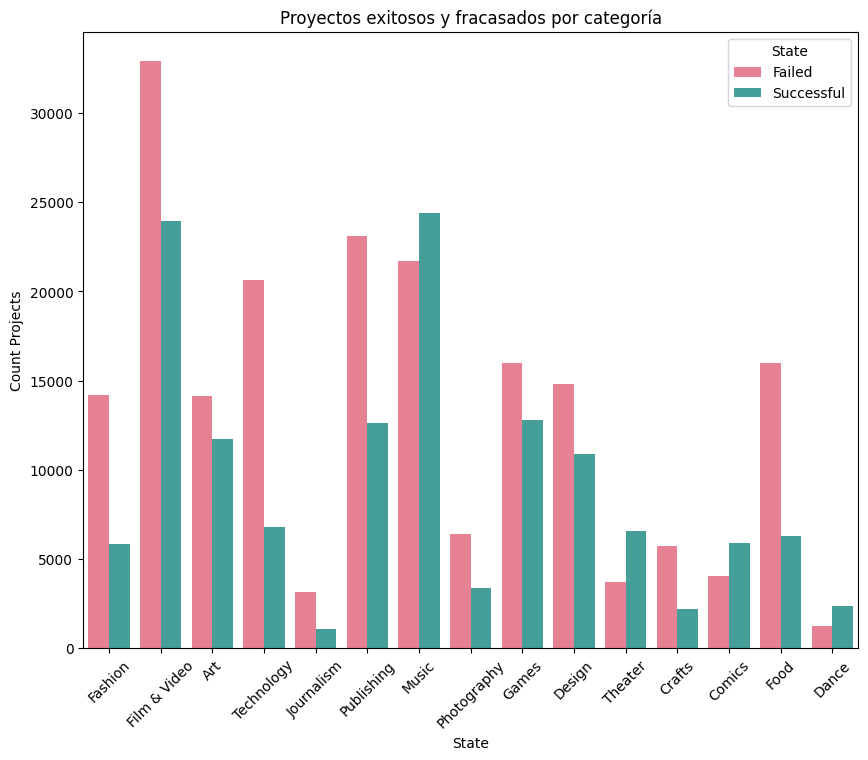

In [ ]:
# Se construye un diagrama de barras para el número de proyectos exitosos y fracasos por cada categoría
plt.figure(figsize=(10,8))
sns.color_palette("husl", 8)
sns.countplot(project_df, x = 'Category',hue = 'State', palette = 'husl');

# Se cambian propiedades del gráfico como el título y la posición de las etiquetas del eje x
plt.title('Proyectos exitosos y fracasados por categoría')
plt.xlabel('State')
plt.ylabel('Count Projects')
plt.xticks(rotation = 45);

El gráfico muestra que la categoría con mayor número de proyectos fracasados es *Film & Video*, sin embargo, curiosamente la categoría con mayor número de proyectos exitosos es *Film & Video* junto con *Music*. Este hecho podría suponer que el método de clasificación tendrá más trabajo al momento de clasificar proyectos que se encuentren en la categoría *Film & Video*.

# **4. Transformación de variables categóricas y escalamiento de variables numéricas**
---

Como ya se había mencionado, el dataframe contiene dos variables categóricas (*Category* y *Country*), que requieren ser transformadas para poder ser utilizadas en el modelo de predicción, mientras que las variables numéricas requieren ser escaladas, ya que algunos métodos de clasificación resultan ser sensibles a este factor. Para el caso de las variables categóricas se empleará el transformador One Hot Encoder y para el caso de las numéricas se utilizará el transformador Standard Scaler.



In [ ]:
# Incialmente, se configuran los datos en el formato X, y.
X = project_df.drop(labels = 'State', axis = 1)
y = project_df['State']

In [ ]:
# Se cargan los módulos requeridos para aplicar las transformaciones
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Se seleccionan las columnas a las que se les aplicará la transformación. dtypes object para categóricas y int 64 para las numéricas.
X_categoric = X.select_dtypes(['object'])
X_numeric = X.select_dtypes(['int64'])
tf = ColumnTransformer([('onehot', OneHotEncoder(), X_categoric.columns),
                        ('scaler', StandardScaler(), X_numeric.columns)])

# Se aplica el ajuste sobre el dataframe. Se supone que la salida es una matriz de Numpy que ya contiene las transformaciones aplicadas.
X_preprocessed = tf.fit_transform(X)

Algunos métodos de clasificación como los árboles de decisión y bosques aleatorios son invariantes al escalamiento de las variables numéricas, por lo tanto, previendo que se trabajará con alguna de estas dos técnicas, a continuación se aplicará la técnica de transformación solo a las variables categóricas, dejando las numéricas con sus valores originales. Esto también con el objetivo de probar en algunos otros métodos el desempeño del modelo con y sin escalamiento de las variables numéricas.

In [ ]:
# Se seleccionan únicamente las variables categóricas del dataframe original
X_categoric = X.select_dtypes(['object'])
tf = ColumnTransformer([('onehot', OneHotEncoder(sparse = False), X_categoric.columns)])

# Se aplica el ajuste sobre el dataframe. Se supone que la salida es una matriz de Numpy que ya contiene las transformaciones aplicadas.
X_preproc_cat = tf.fit_transform(X)

# Se crea una matriz concatenando las variables categóricas transformadas con las variables numéricas sin escalar.
X_preprocessed_2 = np.concatenate((X_preproc_cat, X[['Goal', 'Pledged', 'Backers']].values), axis = 1)

Finalmente, se preprocesará la variable objetivo $y$ con el transformador Label Encoder para cambiar las etiquetas *Failed* y *Successful* por valores de 0 y 1 respectivamente.

In [ ]:
# Se importa el módulo necesario para la transformación
from sklearn.preprocessing import LabelEncoder

# Se declara el transformador en una variable
le = LabelEncoder()

# Se realiza la transformación al arreglo de etiquietas original, y se guarda en una nueva variable
y_preprocessed = le.fit_transform(y)

# Se imprime el tipo de variable y su tamaño para verificar que está en el formato adecuado.
print(type(y_preprocessed))
print(f'Tamaño de X_preprocessed: {y_preprocessed.shape}')

<class 'numpy.ndarray'>
Tamaño de X_preprocessed: (334260,)


# **5. Partición de los datos en entrenamiento y prueba**
---
Enseguida se hará la partición del conjunto en entrenamiento y prueba. Como ya se mención anteriormente, el dataset tiene datos desbalanceados, es decir, la cantidad de datos que corresponden a cada una de las etiquetas no es igual, por lo que se hará una partición estratificada. Como se emplearán datos preprocesados para las variables numéricas y otros que no lo están, se definirá una función que construya las particiones empleando `train_test_split` para cada uno de los dos casos.

In [ ]:
# Se carga el módulo requerido para construir la partición
from sklearn import model_selection

# Se define la función para realizar la partición de los datos
def data_partition(X, y):
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                      test_size = 0.3, 
                                                                      stratify = y)
  return X_train, X_test, y_train, y_test

# **6. Métodos Supervisados**
---
Una vez concluida la etapa de preprocesamiento y preparación de los datos, se aplicarán métodos de clasificación supervisados para resolver el problema que se planteó inicialmente. Por sus bondades y por el problema que se intenta resolver, se probaran los métodos Random Forest (o bosques aleatorios) y redes neuronales. Inicialmente se propone la exploración de algunos hiperparámetros para cada método, por lo que se hará necesario emplear `GridSearchCV`para el particionamiento del conjunto de datos de entrenamiento en las particiones de entrenamiento y validación, con el objetivo de realizar una validación cruzada de 3 pliegues que permita la selección de los mejores hiperparámetros. Una vez seleccionados, se aplicará la predicción y se obtendrán las diferentes métricas de cada método para poder compararlos. 

## **6.1 Método Random Forest**

Por la naturaleza del conjunto de datos y del problema definido (similar a un problema de scores de crédito), se selecciona el método de bosques aleatorios o random forest, para realizar la tarea de clasificación. Los dos hiperparámetros que se probarán serán el criterio (criterion) y la profundidad máxima del árbol (max_depth).

### **6.1.1 Exploración de hiperparámetros**

Inicialmente se construye el diccionario que contendrá el nombre del hiperparámetro, junto con los valores que se explorarán.

In [ ]:
# Criterio
criterion = ['gini', 'entropy']

# Profundidad máxima del árbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Construcción del diccionario con los valores de los hiperparámetros a explorar 
hiperparams = {'criterion': criterion, 'max_depth': max_depth}

Posteriormente, se declara el método de aprendizaje de máquina a emplear en una variable y se define el objeto GridSeachCV para poder realizar la exploración.

In [ ]:
# Se importa el método necesario para la exploración.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Se particionan los datos en entrenamiento y prueba, sin escalar los datos de las variables numéricas
X_train, X_test, y_train, y_test = data_partition(X_preprocessed_2, y_preprocessed)

# Se declara el método de aprendizaje de máquina
clf_rf = RandomForestClassifier()

# Se declara GridSearch para la búsqueda de los hiperparámetros
grid_clf_rf = GridSearchCV(clf_rf, param_grid = hiperparams, cv = 3)

# Se entrena el modelo con los datos de entrenamiento
grid_clf_rf.fit(X_train, y_train)

# Se imprimen los mejores hiperparámetros y el valor de exactitud de validación
print(f'Mejores hiperparámetros:\n {grid_clf_rf.best_params_}')
print(f'Mejor exactitud (validación): {grid_clf_rf.best_score_:.6f}')

Mejores hiperparámetros:
 {'criterion': 'gini', 'max_depth': 30}
Mejor exactitud (validación): 0.988832


### **6.1.2 Clasificación de nuevos datos con la partición de entrenamiento y métricas de desempeño**

Una vez el modelo ha sido entrenado, se usará la partición de prueba con el fin de repetir la tarea de clasificación con datos que el modelo no ha visto antes, y así poder evaluar su desempeño a través de las métricas Accuracy, Precision, Recall y F1 score y la matriz de confusión.

In [ ]:
# Se define una función que permita visualizar la matriz de confusión de una manera apropiada.
def show_cm(cm, classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))
  return df

In [ ]:
# Se importa la librería necesaria para la construcción de la matriz de confusión
from sklearn.metrics import confusion_matrix

# Se construye la variable que contiene las etiquetas predichas por el modelo
y_predt = grid_clf_rf.predict(X_test)

# Se visualiza la matriz de confusión
cm = confusion_matrix(y_test, y_predt)
classes = project_df['State'].unique()
show_cm(cm, classes)

Valor predicho           
                              Failed Successful
Valor real Failed              58907        376
           Successful            703      40292

In [ ]:
# Se importa el módulo requerido para obtener el reporte de métricas de clasificación
from sklearn.metrics import classification_report

# Se imprime el reporte de métricas de desempeño del modelo
print(classification_report(y_test,    
                            y_predt,                                
                            target_names = classes,  
                            digits=4)) 

              precision    recall  f1-score   support

      Failed     0.9882    0.9937    0.9909     59283
  Successful     0.9908    0.9829    0.9868     40995

    accuracy                         0.9892    100278
   macro avg     0.9895    0.9883    0.9889    100278
weighted avg     0.9892    0.9892    0.9892    100278



De la matriz de confusión, se puede observar que el modelo clasificó correctamente 58907 ejemplos de la clase *Failed*, equivocándose en 376, demás de lograr clasificar correctamente 40288 ejemplos de la clase *Successful*, equivocándose en 703. El modelo registró un accuracy de 0.9892, y como se trabajó con un conjunto de datos que no posee un desbalanceo muy significativo, el valor reportado por esta métrica puede considerarse como confiable. Por otro lado, los valores reportados por las métricas de precisión, recall y F1 también son muy buenos, como se puede observar en el reporte de clasificación. En conclusión, el modelo de apredizaje *Random Forest* se puede considerar como un muy buen modelo para la tarea de clasificación, particularmente para el problema abordado en el presente proyecto.

## **6.2 Método de redes neuronales**

Con el objetivo de ensayar otro método de clasificiación para el problema abordado en este proyecto, se aplicará el modelo de redes neuronales para compararlo con el método aplicado anteriormente, y de acuerdo a las métricas de evaluación, poder decidir cúal es de los dos puede realizar mejores predicciones. 

Inicialmente, se aplicará el modelo con los datos correspondientes a las variables numéricas sin realizar un escalamiento, posteriormente se escalarán las variables, usando la técnica de la estandarización y se evaluará el modelo nuevamente, con el fin de determinar si existen mejorías con el hecho de escalar las variables numéricas del conjunto de datos, ya que se supone el módelo de redes neuronales es muy sensible al escalamiento de las variables. Además, se utilizará el método gridsearch para probar el número de neuronas en las capas ocultas, el método de activación, el valor de $\alpha$ y la taza de aprendizaje, para seleccionar los mejores hiperparámetros para la tarea de clasificación del modelo.

### **6.2.1 Exploración de hiperparámetros con variables numéricas sin escalar**

A continuación se repiten los mismos pasos empleados en la exploración de hiperparámetros del método anterior, es decir, se construye el diccionario con los hiperparámetros a explorar y posteriormente se declaran las variables que contentrán cada uno de los objetos necesarios para el entrenamiento del modelo.

In [ ]:
# Se importa el módulo requerido para el uso del método de clasificación
from sklearn.neural_network import MLPClassifier

# Se declara el método en una variable
mlp_gs = MLPClassifier(max_iter=100)

# Se construye el diccionario con los hiperparámetros del modelo a probar
hiperparams = {
    'hidden_layer_sizes': [(10,30,10),(20,)], # Se probarán tres capas ocultas, cada una de 10, 30 y 10 neuronas respectivamente, o una sola capa oculta de 20 neuronas
    'activation': ['logistic', 'relu'], 
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid_clf_nn = GridSearchCV(mlp_gs, hiperparams, cv = 3)
grid_clf_nn.fit(X_train, y_train)

# Se imprimen los mejores hiperparámetros y el valor de exactitud de validación
print(f'Mejores hiperparámetros:\n {grid_clf_nn.best_params_}')
print(f'Mejor exactitud (validación): {grid_clf_nn.best_score_:.6f}')

Mejores hiperparámetros:
 {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive'}
Mejor exactitud (validación): 0.992790


### **6.2.2 Clasificación de nuevos datos con la partición de entrenamiento y métricas de desempeño**

Una vez el modelo ha sido entrenado, se usará la partición de prueba con el fin de repetir la tarea de clasificación con datos que el modelo no ha visto antes, y así poder evaluar su desempeño a través de las métricas Accuracy, Precision, Recall y F1 score y la matriz de confusión.

In [ ]:
# Se construye la variable que contiene las etiquetas predichas por el modelo
y_predt = grid_clf_nn.predict(X_test)

# Se visualiza la matriz de confusión
cm = confusion_matrix(y_test, y_predt)
classes = project_df['State'].unique()
show_cm(cm, classes)

Valor predicho           
                              Failed Successful
Valor real Failed              59182        101
           Successful            693      40302

In [ ]:
# Se imprime el reporte de métricas de desempeño del modelo
print(classification_report(y_test,    
                            y_predt,                                
                            target_names = classes,  
                            digits=4)) 

              precision    recall  f1-score   support

      Failed     0.9884    0.9983    0.9933     59283
  Successful     0.9975    0.9831    0.9902     40995

    accuracy                         0.9921    100278
   macro avg     0.9930    0.9907    0.9918    100278
weighted avg     0.9921    0.9921    0.9921    100278



Como se puede observar en la matriz de confusión, el modelo de aprendizaje por redes neuronales es capaz de clasificar de mejor manera los nuevos ejemplos de las dos clases, ya que se equivocó en 101 y 693 de los ejemplos de la clase Failed y Successful respectivamente, comparados con los 376 y 703 del método de bosques aleatorios. En cuanto a la clasificación de ejemplos correspondientes con la etiqueta Failed, el método de redes neuronales los clasifica con menos errores, mientras que para la etiqueta Successful, la mejoría es muy leve.

### **6.2.3 Exploración de hiperparámetros con variables numéricas escaladas y clasificación de nuevos datos**


Ahora, se volverá a ejecutar el modelo de redes neuronales, esta vez escalando las variables numéricas, para determinar si es posible mejorar la clasificación de los ejemplos correspondientes a la clase *Successful*, y mejorar los resultados obtenidos con el método sin emplear el escalamiento de las variables numéricas.

In [ ]:
# Se particionan los datos en entrenamiento y prueba, escalando los datos de las variables numéricas
X_train, X_test, y_train, y_test = data_partition(X_preprocessed, y_preprocessed)

# Se declara el método para la búsqueda de los hiperparámetros y se entrena el modelo
grid_clf_nn = GridSearchCV(mlp_gs, hiperparams, cv = 3)
grid_clf_nn.fit(X_train, y_train)

# Se imprimen los mejores hiperparámetros y el valor de exactitud de validación
print(f'Mejores hiperparámetros:\n {grid_clf_nn.best_params_}')
print(f'Mejor exactitud (validación): {grid_clf_nn.best_score_:.6f}')

Mejores hiperparámetros:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive'}
Mejor exactitud (validación): 0.919092


Finalmente, se entrena el modelo y se obtienen las diferentes métricas de desempeño

In [ ]:
# Se construye la variable que contiene las etiquetas predichas por el modelo
y_predt = grid_clf_nn.predict(X_test)

# Se visualiza la matriz de confusión
cm = confusion_matrix(y_test, y_predt)
classes = project_df['State'].unique()
show_cm(cm, classes)

Valor predicho           
                              Failed Successful
Valor real Failed              56274       3009
           Successful           3133      37862

In [ ]:
# Se imprime el reporte de métricas de desempeño del modelo
print(classification_report(y_test,    
                            y_predt,                                
                            target_names = classes,  
                            digits=4))

              precision    recall  f1-score   support

      Failed     0.9473    0.9492    0.9483     59283
  Successful     0.9264    0.9236    0.9250     40995

    accuracy                         0.9388    100278
   macro avg     0.9368    0.9364    0.9366    100278
weighted avg     0.9387    0.9388    0.9387    100278



Como se puede apreciar en los valores obtenidos para las métricas, en esta ocasión el modelo empeoró en la clasificación de los nuevos ejemplos con respecto al modelo empleado con variables numéricas sin escalar, además de que para el proceso de búsqueda de hiperparámetros el modelo con las variables numéricas escaladas tardó 1 hora y 20 minutos, mientras que el modelo con las variables numéricas sin escalar solo tardo 16 minutos. Se puede concluir entonces, que este caso particular, el hecho de escalar las variables numéricas desmejoró el desempeño del modelo, además de empeorar su desempeño computacionalmente, al requerir más tiempo para finalizar su proceso de búsqueda de hiperparámetros y entrenamiento.

En comparación con el método de bosques aleatorios, el método de redes neuronales evaluado en variables numéricas sin escalar, mejoró las métricas de desempeño obtenidas inicialmente, y empleó menor tiempo para culminar las fases de búsqueda de hiperparámetros y entrenamiento con respecto al método de bosques aleatororios, que tardó alrededor de 35 minutos en terminar. Así pues, se puede concluir que el método de redes neuronales obtuvo mejores resultados para el proceso de clasificación de los proyectos de la plataforma de crowdfunding y empleó menos tiempo en ejecutar los complejos procesos de búsqueda de hiperparámetros, entrenamiento y prueba.

# **7. Métodos no supervisados de agrupación**
---

Realizamos una prueba con un modelo de aprendizaje no supervisado por agrupamiento (k-means) donde estaremos intentando predecir si es posible determinar que ciertos grupos (clusters) predomine una unica etiqueta externa (1 o 0, siendo 1 "Successful" y 0 representa "failed")

In [ ]:
# Librerias
from sklearn.cluster import KMeans
from sklearn.metrics import *
from sklearn.metrics.cluster import contingency_matrix

Inicialmente definimos las funciones que se utilizarán para las evaluaciones internas y externas de este método.

In [ ]:
# gráfica para la evaluación interna

def plot_metric(K, scores, metric_name):
  plt.figure(dpi=110, figsize=(9, 5))
  plt.plot(K, scores, 'bx-')
  plt.xticks(K); plt.xlabel('$k$', fontdict=dict(family = 'serif', size = 14));  plt.ylabel(metric_name, fontdict=dict(family = 'serif', size = 14));
  plt.title(f'K vs {metric_name}', fontdict=dict(family = 'serif', size = 18))
  plt.show()

In [ ]:
# gráfica para la evaluación externa

def plot_extern_metric(X, y, metric, metric_name):
  scores = []
  for i in range(2,20):
    model = KMeans(n_clusters=i, random_state=32)
    model.fit(X)
    y_pred = model.predict(X)
    scores.append(metric(y, y_pred))

  plot_metric(range(2, 20), scores, metric_name)  

## **7.1 Evaluación interna**

En primer lugar se muestra la inercia en función de la cantidad de clusters para encontrar la cantidad óptima de de grupos. También se prueba genereción de la gráfica del coeficiente de silueta, sin embargo debido al gran costo computacional que representa se descarto la opción para el analisis.

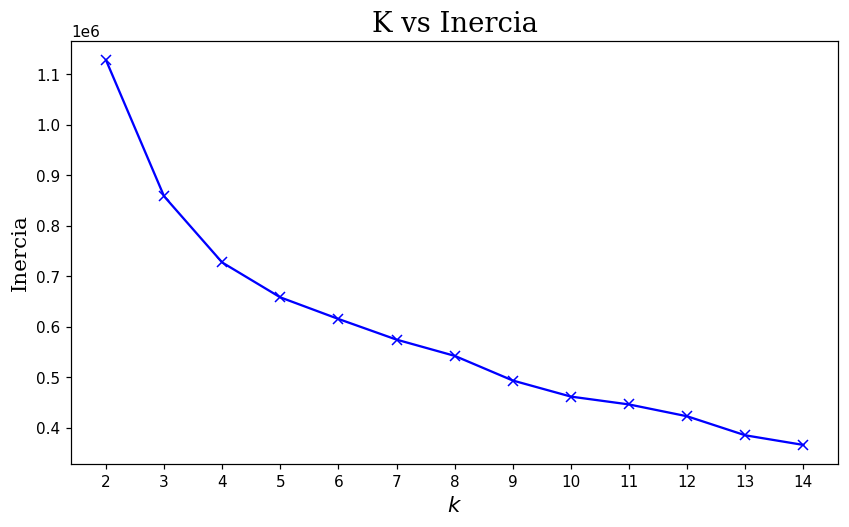

In [ ]:
inertia = []
silhouette = []
K = range(2, 15)
for i in K:
  model = KMeans(n_clusters=i)
  model.fit(X_preprocessed)

  y_predict = model.predict(X_preprocessed)

  inertia.append(model.inertia_)
  # silhouette.append(silhouette_score(X_preprocessed, y_predict))
  

plot_metric(K, inertia, 'Inercia')
# plot_metric(K, silhouette, 'Coeficiente de silueta')

De acuerdo con la evaluación interna, la cantidad optima de cluster se encuentra entre k=5 y k=6. Se continua explorando con evaluaciones externas para validar los resultados sin tener en cuenta los resultados reales del modelo.

## **7.2 Evaluación externa (supervisado)**

Para la evaluación externa se realizan las gráficas de homogeneidad, información mutua y el indice de Rand ajustado. A partir de los valores máximos, o los picos, de estas gráficas se puede estimar de una forma más segura la cantidad de clusters recomendados para el análisis. 

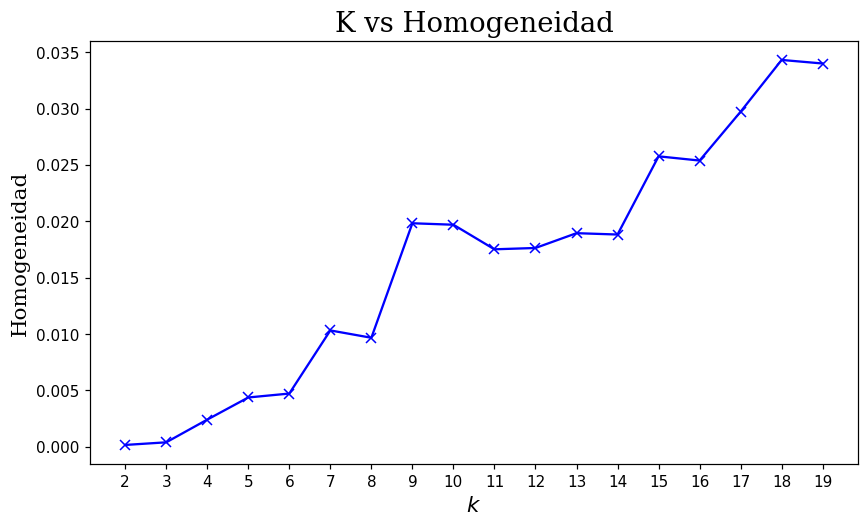

In [ ]:
plot_extern_metric(X_preprocessed, y_preprocessed, homogeneity_score, 'Homogeneidad')

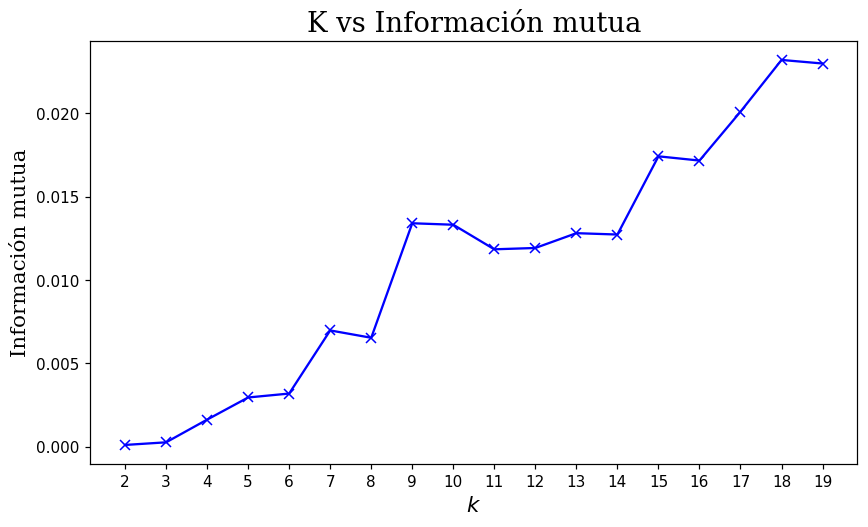

In [ ]:
plot_extern_metric(X_preprocessed, y_preprocessed,
            mutual_info_score, 'Información mutua')

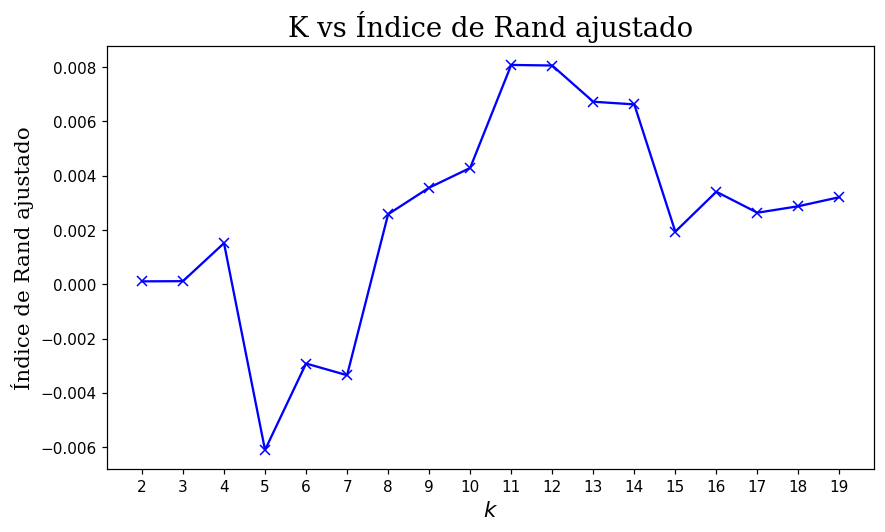

In [ ]:
plot_extern_metric(X_preprocessed, y_preprocessed,
            adjusted_rand_score, 'Índice de Rand ajustado')

De acuerdo a las gráficas de homogeneidad e información mutua, la cantidad recomendada de grupos de k = 9 o k = 10, aunque no son del todo determinantes puesto que no son un máximo absoluto sino uno relativo. Sin embargo, en la gráfica del indice de Rand se puede evidenciar que con k = 11 clusters, se máximiza este indice. Por esta razón, y puesto que la evaluación externa es más determinante, la cantidad de cluster de mayor confianza será k=11.

## **7.3 Matrices de contigencia**

Mediante las siguientes funciones podremos evaluar el modelo k-means para nuestro set de datos. Las funciones a continuación son para la realización de una matriz de contingencia para comparar los clusters contra las etiquetas reales, la siguente muestra la probabilidad de exito en cada uno de los clusters, y la ultima nos ayuda para mostrar y entener los centroides de cada grupo.

In [ ]:
def show_contigency_matrix(X, y, n_clusters, classes):
  # Fijamos la semilla aleatoria para obtener resultados reproducibles.
  model = KMeans(n_clusters, random_state = 21)
  model.fit(X)
  y_pred = model.predict(X)
  mat = contingency_matrix(y, y_pred)
  columns = ['Cluster ' + str(i) for i in range(n_clusters)]
  
  # Se retorna cómo un DataFrame de Pandas para mejorar la visualización.
  return pd.DataFrame(mat, columns=columns, index=classes)

In [ ]:
def show_successful_ratios(X, y, k):
  model = KMeans(n_clusters=k,random_state = 21)
  model.fit(X_preprocessed)

  y_pred = model.predict(X)
 
  for i in range(k):
    ids_group = y_pred == i
    labels_group = y[ids_group]

    # Calculamos la proporción como la media, pues consiste en valores con 0 y 1.    
    success_ratio = np.round(np.mean(labels_group), 5)
    print(f'Proporción de successful grupo {i}: {success_ratio}')

In [ ]:
def show_centroids(X, k, tf):
  model = KMeans(n_clusters=k, random_state=21)
  model.fit(X)

  scaler = tf.named_transformers_['scaler']
  centroids = []

  for centroid in model.cluster_centers_:
    centroid_copy = centroid.copy()
    centroid_copy[37:] = scaler.inverse_transform([centroid_copy[37:]])
    centroids.append(np.round(centroid_copy, 5))
  
  # Definimos una lista con los nombres de las columnas correspondientes.
  columns = ['Fashion', 'Film & Video', 'Art', 'Technology', 'Journalism', 'Publishing',
 'Music', 'Photography', 'Games', 'Design', 'Theater', 'Crafts', 'Comics', 'Food',
 'Dance','United States', 'United Kingdom', 'Canada', 'Australia', 'New Zealand',
 'Netherlands ', 'Sweden', 'Denmark', 'Norway', 'Ireland', 'Germany', 'France',
 'Spain', 'Belgium', 'Italy', 'Switzerland', 'Austria', 'Luxembourg',
 'Singapore', 'Hong Kong', 'Mexico', 'Japan','Goal','Pledged','Backers']


  
  # retornamos un DataFrame
  return pd.DataFrame(centroids, columns=columns)

Se hará una exploración de los resultados de los modelos entrenados para k=5, k=6, k=9, k=10 y k=11.Sin embargo solo se profundiza en la evaluación de k=11 puesto que fue aquel seleccionado según el indice de Rand.

**k=5**

In [ ]:
show_contigency_matrix(X_preprocessed, y_preprocessed, 5, [0,1])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,45541,152020,2,0,48
1,25542,110508,572,26,1


In [ ]:
show_successful_ratios(X_preprocessed, y_preprocessed, 5)

Proporción de successful grupo 0: 0.35933
Proporción de successful grupo 1: 0.42094
Proporción de successful grupo 2: 0.99652
Proporción de successful grupo 3: 1.0
Proporción de successful grupo 4: 0.02041


**k = 6**

In [ ]:
show_contigency_matrix(X_preprocessed, y_preprocessed, 6, [0,1])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,152003,0,48,45537,0,23
1,109543,21,1,25327,111,1646


In [ ]:
show_successful_ratios(X_preprocessed, y_preprocessed, 6)

Proporción de successful grupo 0: 0.41883
Proporción de successful grupo 1: 1.0
Proporción de successful grupo 2: 0.02041
Proporción de successful grupo 3: 0.3574
Proporción de successful grupo 4: 1.0
Proporción de successful grupo 5: 0.98622


**k = 9**

In [ ]:
show_contigency_matrix(X_preprocessed, y_preprocessed, 9, [0,1])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8
0,29092,0,48,0,41656,106355,0,28,20432
1,20874,185,1,24,23044,67331,2,2092,23096


In [ ]:
show_successful_ratios(X_preprocessed, y_preprocessed, 9)

Proporción de successful grupo 0: 0.41776
Proporción de successful grupo 1: 1.0
Proporción de successful grupo 2: 0.02041
Proporción de successful grupo 3: 1.0
Proporción de successful grupo 4: 0.35617
Proporción de successful grupo 5: 0.38766
Proporción de successful grupo 6: 1.0
Proporción de successful grupo 7: 0.98679
Proporción de successful grupo 8: 0.5306


**k = 10**

In [ ]:
show_contigency_matrix(X_preprocessed, y_preprocessed, 10, [0,1])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9
0,19850,0,0,31,38,44178,0,0,133450,64
1,22623,3,30,1,2548,24390,7,260,86787,0


In [ ]:
show_successful_ratios(X_preprocessed, y_preprocessed, 10)

Proporción de successful grupo 0: 0.53264
Proporción de successful grupo 1: 1.0
Proporción de successful grupo 2: 1.0
Proporción de successful grupo 3: 0.03125
Proporción de successful grupo 4: 0.98531
Proporción de successful grupo 5: 0.35571
Proporción de successful grupo 6: 1.0
Proporción de successful grupo 7: 1.0
Proporción de successful grupo 8: 0.39406
Proporción de successful grupo 9: 0.0


**k = 11**

In [ ]:
show_contigency_matrix(X_preprocessed, y_preprocessed, 11, [0,1])

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10
0,30042,31,0,0,27,20430,14832,93663,0,64,38522
1,21387,1,7,170,1998,23099,5916,61966,17,0,22088


In [ ]:
show_successful_ratios(X_preprocessed, y_preprocessed, 11)

Proporción de successful grupo 0: 0.41585
Proporción de successful grupo 1: 0.03125
Proporción de successful grupo 2: 1.0
Proporción de successful grupo 3: 1.0
Proporción de successful grupo 4: 0.98667
Proporción de successful grupo 5: 0.53066
Proporción de successful grupo 6: 0.28514
Proporción de successful grupo 7: 0.39816
Proporción de successful grupo 8: 1.0
Proporción de successful grupo 9: 0.0
Proporción de successful grupo 10: 0.36443


Por lo que podemos ver en la matriz de contingencia es que los grupos donde la clasificación es más evidente, la cantidad de datos es bastante reducidad. Por ejemplo, en k = 11, los grupos más grandes son, el 0,5,6,7 y 10. En estos grupos la posibilidad de exito ronda entre 28% y 53%. Sin embargo, tener 50% de posibilidades de existo en un modelo binario no es muy concluyente por lo que aún esta lejos de ser preciso.

In [ ]:
show_centroids(X_preprocessed, 11, tf)

,Fashion,Film & Video,Art,Technology,Journalism,Publishing,Music,Photography,Games,Design,...,Switzerland,Austria,Luxembourg,Singapore,Hong Kong,Mexico,Japan,Goal,Pledged,Backers
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,...,0.00121,0.00029,0.00299,0.00362,0.00089,0.00000,0.91419,3.929072e+04,5.899771e+03,60.24774
1,0.15625,0.03125,0.00000,0.00000,0.03125,0.03125,0.40625,0.06250,0.06250,0.03125,...,0.00000,0.00000,0.00000,0.00000,0.03125,0.06250,0.71875,9.999533e+07,6.206562e+02,2.37500
2,0.00000,0.00000,0.00000,0.00000,0.71429,0.00000,0.00000,0.00000,0.28571,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,3.885714e+05,1.240751e+07,57763.42857
3,0.01176,0.00588,0.00000,0.00000,0.21765,0.01176,0.02353,0.03529,0.40000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.04706,0.90000,2.252323e+05,2.077091e+06,17187.37059
4,0.00889,0.01975,0.00099,0.00049,0.26420,0.03506,0.05235,0.01333,0.32198,0.00049,...,0.00049,0.00198,0.00494,0.00444,0.00395,0.05481,0.83506,8.933043e+04,3.934347e+05,4321.66667
5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00172,0.00018,0.00296,0.00374,0.00108,0.00000,0.92777,1.171710e+04,3.976520e+03,54.98799
6,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00212,0.00101,0.00496,0.00443,0.00212,0.00000,0.87372,3.308646e+04,4.747027e+03,51.78335
7,0.13207,0.05256,0.03860,0.01987,0.11676,0.09392,0.00000,0.00000,0.12713,0.02009,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2.276428e+04,6.778126e+03,91.96378
8,0.00000,0.00000,0.00000,0.00000,0.05882,0.00000,0.11765,0.00000,0.70588,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.05882,0.88235,7.149510e+05,4.790850e+06,85568.00000
9,0.09375,0.00000,0.00000,0.00000,0.06250,0.01562,0.42188,0.03125,0.03125,0.03125,...,0.00000,0.00000,0.01562,0.00000,0.01562,0.04688,0.79688,3.123432e+07,1.034088e+04,45.73438


En conclusión,debido que para algunos clusters el modelos es muy exacto, pero para los grupos con la mayor cantidad de datos no esta presentando resultados concluyentes, se puede decir que este método nos es del todo adecuado para la interpretación de este grupo de datos

# **8. Regresión logística**
---

Una forma sencilla de abordar este problema es mediante una regresión logistica. Aunque este es uno de los métodos más básicos, es una herramienta muy potente para la agrupación cuando de una clasificación binaria se trata. Para ello evaluaremos algunos de los métodos de solución de regresión logistica que tiene Scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs');
lr_model.fit(X_train, y_train)

print(f'Coeficiente de Determinación con r2_score: {r2_score(y_test, lr_model.predict(X_test)):.4f}')
print(f'Precisión del modelo con respecto al número de aciertos: {accuracy_score(lr_model.predict(X_test),y_test):.4f}')

Coeficiente de Determinación con r2_score: 0.5902
Precisión del modelo con respecto al número de aciertos: 0.9010


In [ ]:
lr_model = LogisticRegression();
lr_model.fit(X_train, y_train)

print(f'Coeficiente de Determinación con r2_score: {r2_score(y_test, lr_model.predict(X_test)):.4f}')
print(f'Precisión del modelo con respecto al número de aciertos: {accuracy_score(lr_model.predict(X_test),y_test):.4f}')

Coeficiente de Determinación con r2_score: 0.5292
Precisión del modelo con respecto al número de aciertos: 0.8862


In [ ]:
lr_model = LogisticRegression(multi_class='multinomial', solver='newton-cg');
lr_model.fit(X_train, y_train)

print(f'Coeficiente de Determinación con r2_score: {r2_score(y_test, lr_model.predict(X_test)):.4f}')
print(f'Precisión del modelo con respecto al número de aciertos: {accuracy_score(lr_model.predict(X_test),y_test):.4f}')

Coeficiente de Determinación con r2_score: 0.5906
Precisión del modelo con respecto al número de aciertos: 0.9011


Este ultimo método es aquel que recibe un máximo valor en el coeficiente de determinación y tiene una precisión del 90%, lo cual es bastante decente para un metodo de regresión sencillo. A pesar de ser muy bueno, se sigue quedando corto con respecto al resto de métodos de aprendizaje supervisado.

Algo que podemos interpretar de esta regresión es el peso en cada uno de los coeficientes para determinar si representan una caracteristica positiva o negativa a la hora de comprobar el exito en el crowdfunding.

Text(0.5, 1.0, 'Peso de cada una de las columnas en el modelo de regresión logística')

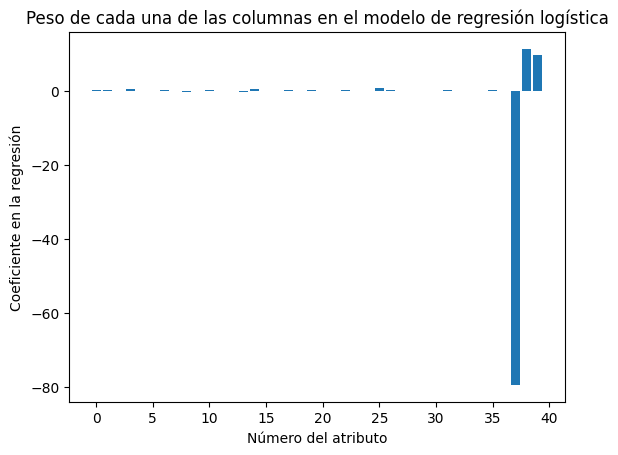

In [ ]:
plt.bar(height=lr_model.coef_[0],x=range(40))
plt.xlabel('Número del atributo')
plt.ylabel('Coeficiente en la regresión')
plt.title('Peso de cada una de las columnas en el modelo de regresión logística')

A pesar de que se ve que las ultimas 3 columnas (las númericas) son las de mayor peso, esto se puede deber a que esta variable puede tener valores mucho menores a los de las variables categoricas (que al ser usadas son 1 gracias al One Hot Encoder), entonces a pesar de que se vea como que son las variables de mayor y unica importancia, no es necesariamente así.

In [ ]:
lista_x = ['Fashion', 'Film & Video', 'Art', 'Technology', 'Journalism', 'Publishing',
        'Music', 'Photography', 'Games', 'Design', 'Theater', 'Crafts', 'Comics', 'Food',
        'Dance','United States', 'United Kingdom', 'Canada', 'Australia', 'New Zealand',
        'Netherlands ', 'Sweden', 'Denmark', 'Norway', 'Ireland', 'Germany', 'France',
        'Spain', 'Belgium', 'Italy', 'Switzerland', 'Austria', 'Luxembourg',
        'Singapore', 'Hong Kong', 'Mexico', 'Japan','Goal','Pledged','Backers']


df_lrcoef = pd.DataFrame(zip(lista_x,lr_model.coef_[0],np.abs(lr_model.coef_[0])),
             columns=['columna','coeficiente_lr','coef_abs']).sort_values('coef_abs',ascending=False)

df_lrcoef.head(10)

,columna,coeficiente_lr,coef_abs
37,Goal,-79.378794,79.378794
38,Pledged,11.239742,11.239742
39,Backers,9.533557,9.533557
25,Germany,0.659382,0.659382
14,Dance,0.499458,0.499458
3,Technology,0.479772,0.479772
13,Food,-0.361006,0.361006
8,Games,-0.303295,0.303295
10,Theater,0.235534,0.235534
4,Journalism,-0.232214,0.232214


In [ ]:
lista_categ = list(X['Category'].unique())
lista_country = list(X['Country'].unique())

<BarContainer object of 15 artists>

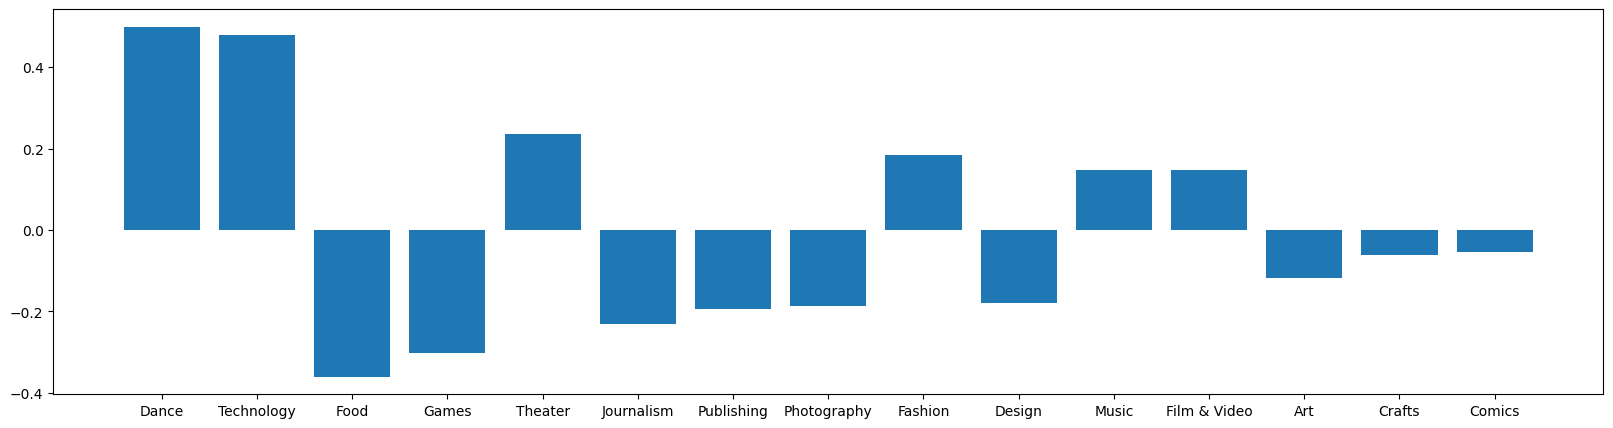

In [ ]:
fig,ax = plt.subplots(1,figsize=(20,5))
plt.bar(data = df_lrcoef[df_lrcoef['columna'].isin(lista_categ)],
        x='columna',
        height = 'coeficiente_lr')

Teniendo en cuenta solo aquellas variable que pertenecen a la columna "Category" al comienzo tenemos lo siguiente, donde las categorias de Baile, Tecnología, Teatro, Moda, Peliculas y videos y música, son aquellos que tienen un peso positivo dentro del modelo, mientras que las categorías de comida, juegos, periodismo, publicidad, diseño, fotografía, arte y comics son aquellas con un peso negativo. Si se interpreta estos pesos como un determinante de exito, se puede discriminar por categorias cuales tienen mayor probabilidad de tener exito que otros.

<BarContainer object of 22 artists>

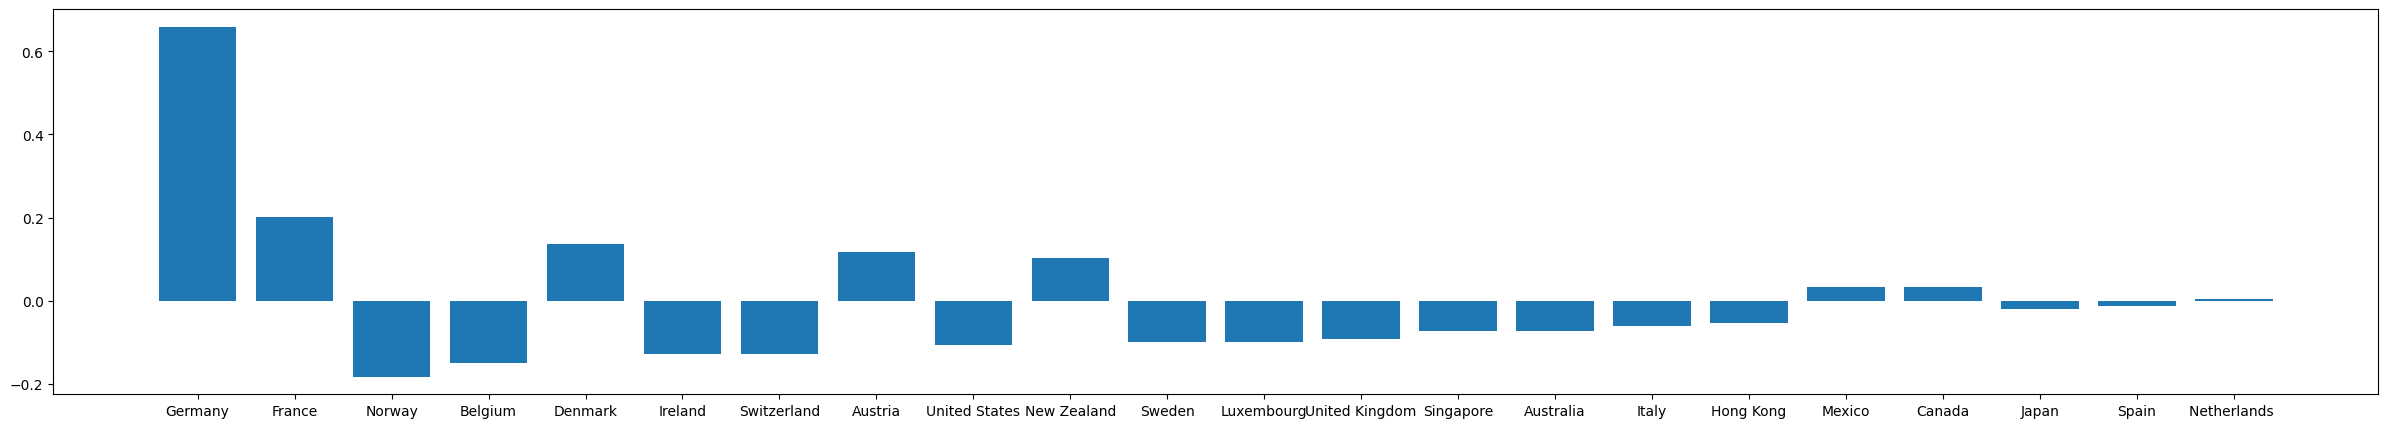

In [ ]:
fig,ax = plt.subplots(1,figsize=(30,5))
plt.bar(data = df_lrcoef[df_lrcoef['columna'].isin(lista_country)],
        x='columna',
        height = 'coeficiente_lr')

Realizando el mismo ejercicio pero con los paises, se tiene que los paises con coeficiente positivo son dinamarca, alemania, nueva zelanda, Mexico, Francia y Holanda. Mientras que los que tiene coeficientes negativos son Noruega, Reino unido, Belgica, Irlanda, Suecia, Suiza, EEUU, Hong Kong, Luxemburgo, Singapur, Autralia, España y Cánada.

# **9. Reducción de dimensionalidad**
---

Algo que se puede intentar es reducir la dimensionalidad, ya que se está trabajando con más de 300k filas y 40 columnas, es probable que reducir la cantidad de dimensiones que tiene el modelo, se pueda mejorar el rendimiento de los modelos.

In [ ]:
# Análisis de componentes principales (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=1) 
pca.fit(X_preprocessed.toarray())

PCA(n_components=1)

In [ ]:
Xt = pca.transform(X_preprocessed.toarray())

print(X_preprocessed.shape, Xt.shape) 

(334260, 40) (334260, 1)


Text(0.5, 1.0, 'Visualización 2D mediante reducción de dimensionalidad PCA')

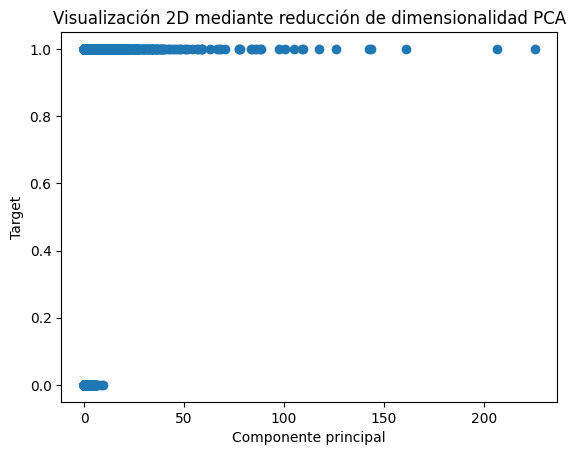

In [ ]:
plt.scatter(Xt,y_preprocessed)
plt.xlabel('Componente principal')
plt.ylabel('Target')
plt.title('Visualización 2D mediante reducción de dimensionalidad PCA')

Reduciendo el modelo a tan solo una dimensión, se puede notar que no hay forma de separar identificar (en 1D, que es la componente principal), la diferencia entre las etiquetas con 0 y las que tienen 1. Por lo que es necesario encontrar el número optimo de dimensiones a las que se puede reducir el modelo. Para ello, se utiliza la siguiente función que gráfica la varianza en función de la cantidad de dimensiones.

In [ ]:
def cumulative_explained_variance_plot(expl_variance):

  cum_var_exp = np.cumsum(expl_variance)

  plt.figure(dpi = 100, figsize = (8, 6))
  plt.title('Curva acumulativa de la varianza explicada VS n° de componentes principales', 
            fontdict= dict(family ='serif', size = 16))
  plt.xlabel('Número de componentes principales',
             fontdict= dict(family ='serif', size = 14))
  plt.ylabel('Varianza explicada acumulativa',
             fontdict= dict(family ='serif', size = 14))  

  nc = np.arange(1, expl_variance.shape[0] + 1)

  plt.plot(nc, cum_var_exp, '--r')
  plt.plot(nc, cum_var_exp, 'c*', ms = 5)   
  plt.show()

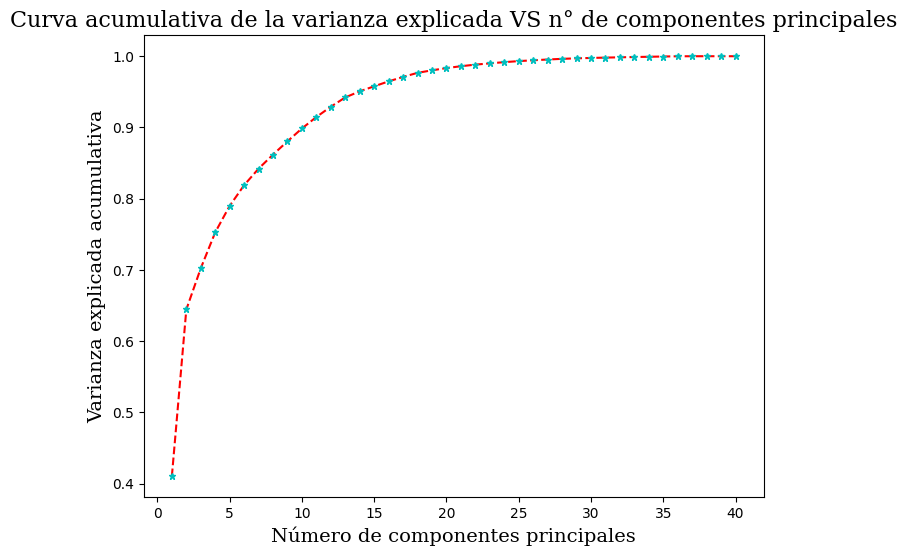

In [ ]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_preprocessed.toarray())
varianza_expl = pca.explained_variance_ratio_

cum_var_exp = np.cumsum(varianza_expl)

cumulative_explained_variance_plot(varianza_expl)

De acuerdo a la curva acumulativa de varianza, que entre las 10 y 20 dimensiones se encuentra el valor optimo para una reducción dimensional del conjunto de datos.

In [ ]:
# Selección de modelos y validación cruzada.
from sklearn.model_selection import cross_val_score

# Métodos de modelado - Clasificación con NaiveBayes Gaussiano.
from sklearn.naive_bayes import GaussianNB

pca = PCA(n_components=10) 
pca.fit(X_preprocessed.toarray())
Xt_10 = pca.transform(X_preprocessed.toarray())

pca = PCA(n_components=15) 
pca.fit(X_preprocessed.toarray())
Xt_15 = pca.transform(X_preprocessed.toarray())

pca = PCA(n_components=20) 
pca.fit(X_preprocessed.toarray())
Xt_20 = pca.transform(X_preprocessed.toarray())

print(f"Accuracy con datos originales: {np.mean(cross_val_score(GaussianNB(), X_preprocessed.toarray(), y_preprocessed, cv=5)):.4f}")
print(f"Accuracy con 10 componentes: {np.mean(cross_val_score(GaussianNB(), Xt_10, y_preprocessed, cv=5)):.4f}")
print(f"Accuracy con 15 componentes: {np.mean(cross_val_score(GaussianNB(), Xt_15, y_preprocessed, cv=5)):.4f}")
print(f"Accuracy con 20 componentes: {np.mean(cross_val_score(GaussianNB(), Xt_20, y_preprocessed, cv=5)):.4f}")

Accuracy con datos originales: 0.7080
Accuracy con 10 componentes: 0.6825
Accuracy con 15 componentes: 0.6871
Accuracy con 20 componentes: 0.6902


De acuerdo a los resultados, y usando el método de Naive-Bayes, se determina que la reducción de dimensionalidad para 10 componentes es solo 2% menos precisa que la precisión con la totalidad de los datos, por lo que usar entre 10 y 15 dimensiones para este modelo puede resultar suficiente y puede ayudar con el costo computacional del entrenamiento y estimación.

# **10. Conclusiones**
---

Algunas conclusiones que se derivan del trabajo realizado con el conjunto de datos y los métodos de apredinzaje de máquina supervisados y no supervisados que se aplicaron, fueron las siguientes:



*   El método de redes neuronales, en comparación con el método de bosques aleatorios, clasifica de mejor manera el conjunto de datos correspondientes a la partición de prueba, además de arrojar mejores resultaos en cuanto a tiempo de cómputo.
*   Sorpresivamente el escalamiento de variables, al menos en este caso particular, en este caso no mejora el desempeño del modelo de redes neuronales y por el contrario, afecta considerablemente el rendimiento del mismo al requerir de bastante tiempo de computo para ejecutar la tarea de entrenamiento y clasificación, comparada con el tiempo empleado por el mismo algoritmo con las variables numéricas sin escalar.
* Los resultados de clasificación binaria obtenidos por los dos métodos de aprendizaje de máquina supervisados que se emplearon en este trabajo, son bastante buenos, afirmación que se puede corroborar con las métricas de desempeño obtenidas en cada caso. Aunque el dataset se encontrara desabalanceado, su desbalanceo no fue significativo y pudo ser trabajado con los métodos seleccionados sin afectar de ninguna manera las métricas de desempeño.

* A diferencia de la confiabilidad que dan los métodos de aprendizaje supervisado, el método k-means (no supervisado) se queda corto en terminos de precisión en comparación con los métodos supervisados. La forma de agrupación por clusters no resulto apropiada en este caso particular.

* El metodo de Support Vector Machine no pudo ser ejecutado incluso después de hacer una reducción de dimensionalidad mediante PCA, en el cual se redujo de 40 a 10 dimensiones. El costo computacional de este método resulto ser demasiado alto y es por ello que no se tiene en la selección del método más adecuado.

* La regresión logistica, aunque es un método de regresión y es extremadamente sencillo en comparación de los demás métodos, resulto tener una precisión considerable en la evaluación de los modelos. Aunque no es el método con los mejores resultados en metricas, resulta ser una aproximación interesante que se puede tener en cuenta en caso de querer ahorrar en costo computacional.